In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import pandas as pd
import seaborn as sns# Carregando dataset


In [2]:
data = pd.read_csv("Base_Completa.csv", sep = ';', encoding = 'iso-8859-1', squeeze = True, low_memory=False)
#data = pd.read_csv("Base_Completa.csv", sep=';', encoding='utf-8', low_memory=False)
df = data

df = df[df.TAXA_PARTICIPACAO_5EF!=0]

q1 = df['MEDIA_5EF_LP'].quantile(q=0.25)
q4 = df['MEDIA_5EF_LP'].quantile(q=0.75)

df1Q = df[df['MEDIA_5EF_LP']<q1]
df4Q = df[df['MEDIA_5EF_LP']>q4]

df1Q.loc[:,'ROTULO'] = 0
df4Q.loc[:,'ROTULO'] = 1

treino_base_LP = pd.concat([df4Q , df1Q])


C:\Users\Kimbelly\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Kimbelly\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [3]:
%%timeit
df.describe

81.7 ns ± 2.09 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [4]:
#df = df.drop(df[(df['TAXA_PARTICIPACAO_5EF'] <= 0)].index)

df.shape

(47771, 258)

In [5]:
#df[['TAXA_PARTICIPACAO_9EF']]

In [6]:
#for x in data.columns:
  #  print(x)

In [7]:
atributos = ['IN_AGUA_FILTRADA','IN_AGUA_REDE_PUBLICA','IN_AGUA_POCO_ARTESIANO','IN_AGUA_CACIMBA'
,'IN_AGUA_FONTE_RIO','IN_AGUA_INEXISTENTE','IN_ENERGIA_REDE_PUBLICA','IN_ENERGIA_GERADOR'
,'IN_ENERGIA_OUTROS','IN_ENERGIA_INEXISTENTE','IN_ESGOTO_REDE_PUBLICA','IN_ESGOTO_FOSSA'
,'IN_ESGOTO_INEXISTENTE','IN_LIXO_COLETA_PERIODICA','IN_LIXO_QUEIMA'
,'IN_LIXO_JOGA_OUTRA_AREA','IN_LIXO_RECICLA','IN_LIXO_ENTERRA','IN_LIXO_OUTROS'
,'IN_SALA_DIRETORIA','IN_SALA_PROFESSOR','IN_LABORATORIO_INFORMATICA'
,'IN_LABORATORIO_CIENCIAS','IN_SALA_ATENDIMENTO_ESPECIAL','IN_QUADRA_ESPORTES_COBERTA'
,'IN_QUADRA_ESPORTES_DESCOBERTA','IN_QUADRA_ESPORTES','IN_COZINHA','IN_BIBLIOTECA'
,'IN_SALA_LEITURA','IN_BIBLIOTECA_SALA_LEITURA','IN_PARQUE_INFANTIL','IN_BERCARIO'
,'IN_BANHEIRO_FORA_PREDIO'
,'IN_BANHEIRO_DENTRO_PREDIO'
,'IN_BANHEIRO_EI'
,'IN_BANHEIRO_PNE'
,'IN_DEPENDENCIAS_PNE'
,'IN_SECRETARIA'
,'IN_BANHEIRO_CHUVEIRO'
,'IN_REFEITORIO'
,'IN_DESPENSA'
,'IN_ALMOXARIFADO'
,'IN_AUDITORIO'
,'IN_PATIO_COBERTO'
,'IN_PATIO_DESCOBERTO'
,'IN_ALOJAM_ALUNO'
,'IN_ALOJAM_PROFESSOR'
,'IN_AREA_VERDE'
,'IN_LAVANDERIA'
,'IN_DEPENDENCIAS_OUTRAS'
,'QT_SALAS_EXISTENTES'
,'QT_SALAS_UTILIZADAS'
,'IN_EQUIP_TV'
,'IN_EQUIP_VIDEOCASSETE'
,'IN_EQUIP_DVD'
,'IN_EQUIP_PARABOLICA'
,'IN_EQUIP_COPIADORA'
,'IN_EQUIP_RETROPROJETOR'
,'IN_EQUIP_IMPRESSORA'
,'IN_EQUIP_IMPRESSORA_MULT'
,'IN_EQUIP_SOM'
,'IN_EQUIP_MULTIMIDIA'
,'IN_EQUIP_FAX'
,'IN_EQUIP_FOTO'
,'IN_COMPUTADOR'
,'QT_EQUIP_TV'
,'QT_EQUIP_VIDEOCASSETE'
,'QT_EQUIP_DVD'
,'QT_EQUIP_PARABOLICA'
,'QT_EQUIP_COPIADORA'
,'QT_EQUIP_RETROPROJETOR'
,'QT_EQUIP_IMPRESSORA'
,'QT_EQUIP_IMPRESSORA_MULT'
,'QT_EQUIP_SOM'
,'QT_EQUIP_MULTIMIDIA'
,'QT_EQUIP_FAX'
,'QT_EQUIP_FOTO'
,'QT_COMPUTADOR'
,'QT_COMP_ADMINISTRATIVO'
,'QT_COMP_ALUNO'
,'IN_INTERNET'
,'IN_BANDA_LARGA'
,'QT_FUNCIONARIOS'
,'IN_ALIMENTACAO'
,'TP_AEE'
,'TP_ATIVIDADE_COMPLEMENTAR'
,'IN_FUNDAMENTAL_CICLOS'
,'TP_LOCALIZACAO_DIFERENCIADA'
,'IN_MATERIAL_ESP_QUILOMBOLA'
,'IN_MATERIAL_ESP_INDIGENA'
,'IN_MATERIAL_ESP_NAO_UTILIZA'
,'IN_EDUCACAO_INDIGENA'
,'TP_INDIGENA_LINGUA'
,'CO_LINGUA_INDIGENA'
,'IN_BRASIL_ALFABETIZADO'
,'IN_FINAL_SEMANA'
,'IN_FORMACAO_ALTERNANCIA'
,'IN_MEDIACAO_PRESENCIAL'
,'IN_MEDIACAO_SEMIPRESENCIAL'
,'IN_MEDIACAO_EAD'
,'IN_ESPECIAL_EXCLUSIVA'
,'IN_REGULAR'
,'IN_EJA'
,'IN_PROFISSIONALIZANTE'
,'IN_COMUM_CRECHE'
,'IN_COMUM_PRE'
,'IN_COMUM_FUND_AI'
,'IN_COMUM_FUND_AF'
,'IN_COMUM_MEDIO_MEDIO'
,'IN_COMUM_MEDIO_INTEGRADO'
,'IN_COMUM_MEDIO_NORMAL'
,'IN_ESP_EXCLUSIVA_CRECHE'
,'IN_ESP_EXCLUSIVA_PRE'
,'IN_ESP_EXCLUSIVA_FUND_AI'
,'IN_ESP_EXCLUSIVA_FUND_AF'
,'IN_ESP_EXCLUSIVA_MEDIO_MEDIO'
,'IN_ESP_EXCLUSIVA_MEDIO_INTEGR'
,'IN_ESP_EXCLUSIVA_MEDIO_NORMAL'
,'IN_COMUM_EJA_FUND'
,'IN_COMUM_EJA_MEDIO'
,'IN_COMUM_EJA_PROF'
,'IN_ESP_EXCLUSIVA_EJA_FUND'
,'IN_ESP_EXCLUSIVA_EJA_MEDIO'
,'IN_ESP_EXCLUSIVA_EJA_PROF'
,'IN_COMUM_PROF'
,'IN_ESP_EXCLUSIVA_PROF'
,'CO_UF', 'CO_REGIAO']

In [8]:
#atributos = ["TAXA_PARTICIPACAO_5EF", "TP_DEPENDENCIA", "IN_AGUA_INEXISTENTE", "IN_ENERGIA_INEXISTENTE", "IN_ESGOTO_INEXISTENTE","IN_LABORATORIO_INFORMATICA", "IN_LABORATORIO_CIENCIAS", "IN_QUADRA_ESPORTES", "IN_BIBLIOTECA_SALA_LEITURA", "IN_PATIO_COBERTO", "IN_SALA_DIRETORIA", "IN_SALA_PROFESSOR", "IN_AUDITORIO", "IN_DEPENDENCIAS_PNE", "IN_EQUIP_TV","IN_EQUIP_COPIADORA", "IN_EQUIP_RETROPROJETOR", "IN_EQUIP_IMPRESSORA", "IN_EQUIP_SOM", "IN_COMPUTADOR", "IN_INTERNET", "CO_UF", "CO_REGIAO"]
#testar o outro com "TAXA_PARTICIPACAO_5EF", "TP_DEPENDENCIA"

In [9]:
X = treino_base_LP.loc[:, atributos ].values
y = treino_base_LP.loc[:,'ROTULO'].values


#df['rotulo'] = list(map(lambda x : 1 if x>300 else 0, df.loc[:,'MEDIA_TOTAL_5EF']))
#y = df['rotulo']

In [10]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.30, random_state = 0)


In [11]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [12]:
# Fitting the classifier into the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_Train,Y_Train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [13]:
# Predicting the test set results
#%%timeit
Y_Pred = classifier.predict(X_Test)

# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(cm)
print(classification_report(Y_Test, Y_Pred))

[[3267  286]
 [ 565 3046]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3553
           1       0.91      0.84      0.88      3611

   micro avg       0.88      0.88      0.88      7164
   macro avg       0.88      0.88      0.88      7164
weighted avg       0.88      0.88      0.88      7164



In [16]:
#testando validação cruzada e consequencias do aumento de estimadores na acurácia

In [17]:

from sklearn.model_selection import validation_curve
param_range = [10, 50, 100, 200,300,400,500,800,1000,1500]
crossvalidation = KFold(n_splits=3,shuffle=True,random_state=1)
RF_cls = RandomForestClassifier(n_estimators=200,random_state=0)
train_scores, test_scores = validation_curve(RF_cls, X, y,
'n_estimators',
param_range=param_range,
cv=crossvalidation,
scoring='accuracy')
mean_test_scores = np.mean(test_scores, axis=1)

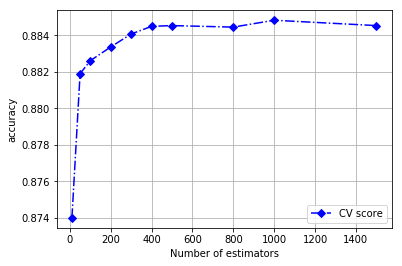

In [18]:
import matplotlib.pyplot as plt
plt.plot(param_range, mean_test_scores,
'bD-.', label='CV score')
plt.grid()
plt.xlabel('Number of estimators')
plt.ylabel('accuracy')
plt.legend(loc='lower right', numpoints= 1)
plt.show()

In [19]:
#testando agora os melhores parâmetros

In [20]:
crossvalidation = KFold(n_splits=5, shuffle=True,
random_state=1)
RF_cls = RandomForestClassifier(random_state=1)
scorer = 'accuracy'
#print('Accuracy: %.3f' % score)

In [21]:
from sklearn.model_selection import GridSearchCV
max_features = [X.shape[1]//3, 'sqrt', 'log2', 'auto']
min_samples_leaf = [1, 10, 30]
n_estimators = [50, 100, 300]
search_grid = {'n_estimators':n_estimators,
'max_features': max_features,
'min_samples_leaf': min_samples_leaf}
search_func = GridSearchCV(estimator=RF_cls,
param_grid=search_grid,
scoring=scorer,
cv=crossvalidation)
search_func.fit(X, y)
best_params = search_func.best_params_
best_score = search_func.best_score_
print('Best parameters: %s' % best_params)
print('Best accuracy: %.3f' % (best_score*100))


KeyboardInterrupt: 

In [ ]:
print('Best accuracy: %s' % (best_score * 100))


In [ ]:
RF_cls.fit(X_Train, Y_Train)# Mostrando importância de cada feature
RF_cls.feature_importances_

In [ ]:
importances = pd.Series(RF_cls.feature_importances_, atributos)
importances.nlargest(25).plot(kind='barh')